In [92]:
import pandas as pd
df=pd.read_csv('auto.csv')

In [93]:
df

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,17.0
...,...,...,...,...,...,...,...,...
387,4,140.0,86.0,2790.0,15.6,82,1,27.0
388,4,97.0,52.0,2130.0,24.6,82,2,44.0
389,4,135.0,84.0,2295.0,11.6,82,1,32.0
390,4,120.0,79.0,2625.0,18.6,82,1,28.0


In [94]:
y=df['mpg']
X=df.drop(columns='mpg')

In [95]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
reg = DecisionTreeRegressor(max_depth=2)
reg.fit(X,y)


DecisionTreeRegressor(max_depth=2)

[Text(558.0, 362.4, 'displacement <= 190.5\nmse = 60.763\nsamples = 392\nvalue = 23.446'),
 Text(279.0, 217.44, 'horsepower <= 70.5\nmse = 35.072\nsamples = 222\nvalue = 28.642'),
 Text(139.5, 72.47999999999996, 'mse = 25.405\nsamples = 71\nvalue = 33.666'),
 Text(418.5, 72.47999999999996, 'mse = 22.169\nsamples = 151\nvalue = 26.28'),
 Text(837.0, 217.44, 'horsepower <= 127.0\nmse = 13.001\nsamples = 170\nvalue = 16.66'),
 Text(697.5, 72.47999999999996, 'mse = 10.026\nsamples = 74\nvalue = 19.438'),
 Text(976.5, 72.47999999999996, 'mse = 4.761\nsamples = 96\nvalue = 14.519')]

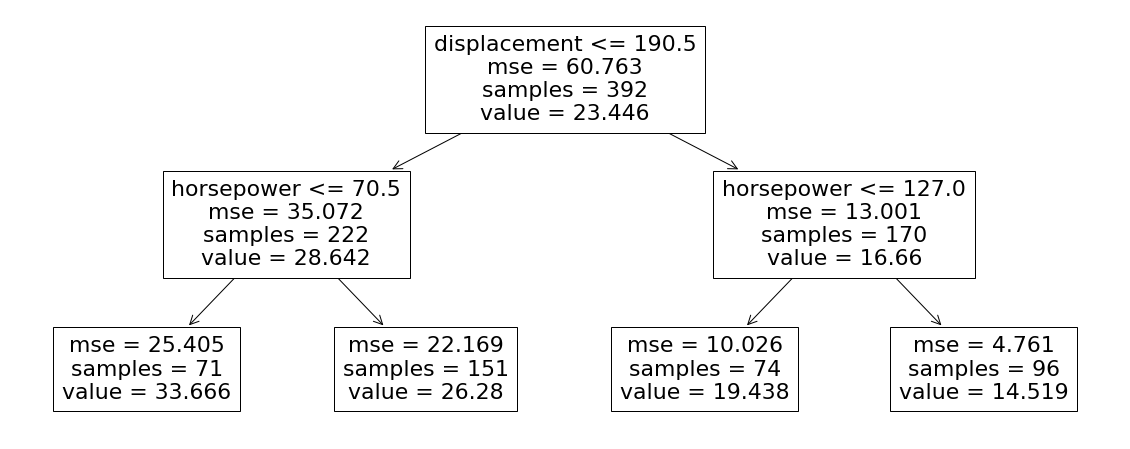

In [96]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plot_tree(reg,feature_names=X.columns)


In [98]:
from sklearn.model_selection import KFold, cross_validate
kfold=KFold(n_splits=5, shuffle=True)
# result={}
for i in range(2,30):
    reg = DecisionTreeRegressor(max_depth=i)
    reg.fit(X,y)
    result=cross_validate(X=X,y=y,cv=kfold,scoring=['r2','neg_mean_squared_error'],estimator=reg, return_train_score=True)
    print(i, result['test_r2'].mean(), result['test_neg_mean_squared_error'].mean())
    
    

2 0.6711908049891739 -20.058323052995867
3 0.7598857765696744 -14.490319680997624
4 0.7878098157266302 -12.805949352633835
5 0.8030851138240926 -12.040672907108242
6 0.7879141868717379 -12.5549937576397
7 0.7986930486383992 -12.245281045790936
8 0.7500504745085378 -15.05268968746466
9 0.7696815439370583 -13.698251892796543
10 0.7660265218574575 -13.82732142788095
11 0.7530167029571155 -15.10252438677054
12 0.7162011667961542 -16.84482988817762
13 0.7433354139966634 -15.26456892603412
14 0.7429672565879059 -15.06188624023786
15 0.7628486772642568 -14.339864532272518
16 0.7613334667083016 -13.96082269465181
17 0.7296510090650761 -16.10208599116375
18 0.7454459316610081 -15.259685491723465
19 0.7656948243565005 -13.86865757870821
20 0.8009740095438987 -12.086064913988967
21 0.7265354191482356 -15.552928919182083
22 0.7649578516913909 -13.76432164881532
23 0.7750937520345997 -13.387745861733205
24 0.7565984756362356 -14.693239532619279
25 0.7825465263495397 -13.070102564102564
26 0.7220077

In [88]:
train_r2 = [-result[i]['train_neg_mean_squared_error'].mean() for i in result]
test_r2 = [-result[i]['test_neg_mean_squared_error'].mean() for i in result]

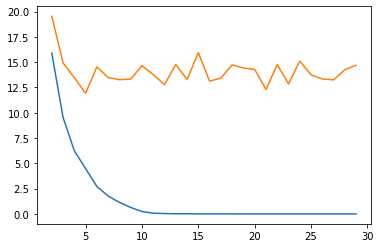

In [89]:
import matplotlib.pyplot as plt
plt.plot(range(2,30),train_r2)
plt.plot(range(2,30),test_r2)

## Random Forest

In [72]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.ensemble import RandomForestRegressor
kfold=KFold(n_splits=5, shuffle=True)
reg = RandomForestRegressor()
reg.fit(X,y)
result=cross_validate(X=X,y=y,cv=kfold,scoring=['r2','neg_mean_squared_error'],estimator=reg)
print(result['test_r2'].mean(), result['test_neg_mean_squared_error'].mean())

0.8674087397642054 -7.907163694677047


## Hyper Parameter Search for Random Forest

In [73]:
param_grid = { 
    'n_estimators': [50,100,200,300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],    
}

In [74]:
from sklearn.model_selection import GridSearchCV
kfold=KFold(n_splits=5, shuffle=True)
reg = RandomForestRegressor()
grid=GridSearchCV(estimator=reg, param_grid=param_grid, scoring='r2', cv=kfold, verbose=1, n_jobs=-1)

In [75]:
grid.fit(X,y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    2.4s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='r2', verbose=1)

In [76]:
grid.best_score_

0.8796803854037325

## Classification

In [99]:
df = pd.read_csv('heart.csv')
df=df.dropna()

In [100]:
df=pd.get_dummies(df,columns=['Sex','AHD','ChestPain','Thal','AHD'])

In [101]:
y=df['AHD_Yes']
X=df.drop(columns=['AHD_No','AHD_Yes'])

In [102]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.ensemble import RandomForestClassifier
kfold=KFold(n_splits=5, shuffle=True)
rf = RandomForestClassifier()
rf.fit(X,y)
result=cross_validate(X=X,y=y,cv=kfold,scoring=['accuracy','roc_auc'],estimator=rf)
print(result['test_accuracy'].mean(), result['test_roc_auc'].mean())

0.8182485875706215 0.8948975655964903


In [103]:
param_grid = { 
    'n_estimators': [50,100,200,300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],    
}

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
kfold=KFold(n_splits=5, shuffle=True)
rf = RandomForestClassifier()
grid=GridSearchCV(estimator=rf, param_grid=param_grid, scoring='roc_auc', cv=kfold, verbose=1, n_jobs=-1)

In [108]:
grid.fit(X,y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    5.3s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='roc_auc', verbose=1)

In [109]:
grid.best_score_

0.9140622483877172